<a href="https://colab.research.google.com/github/AnouskaJ/Bank-Employee-Details/blob/main/Bank_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Bank Details Classification and Regression"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


ValueError: ignored

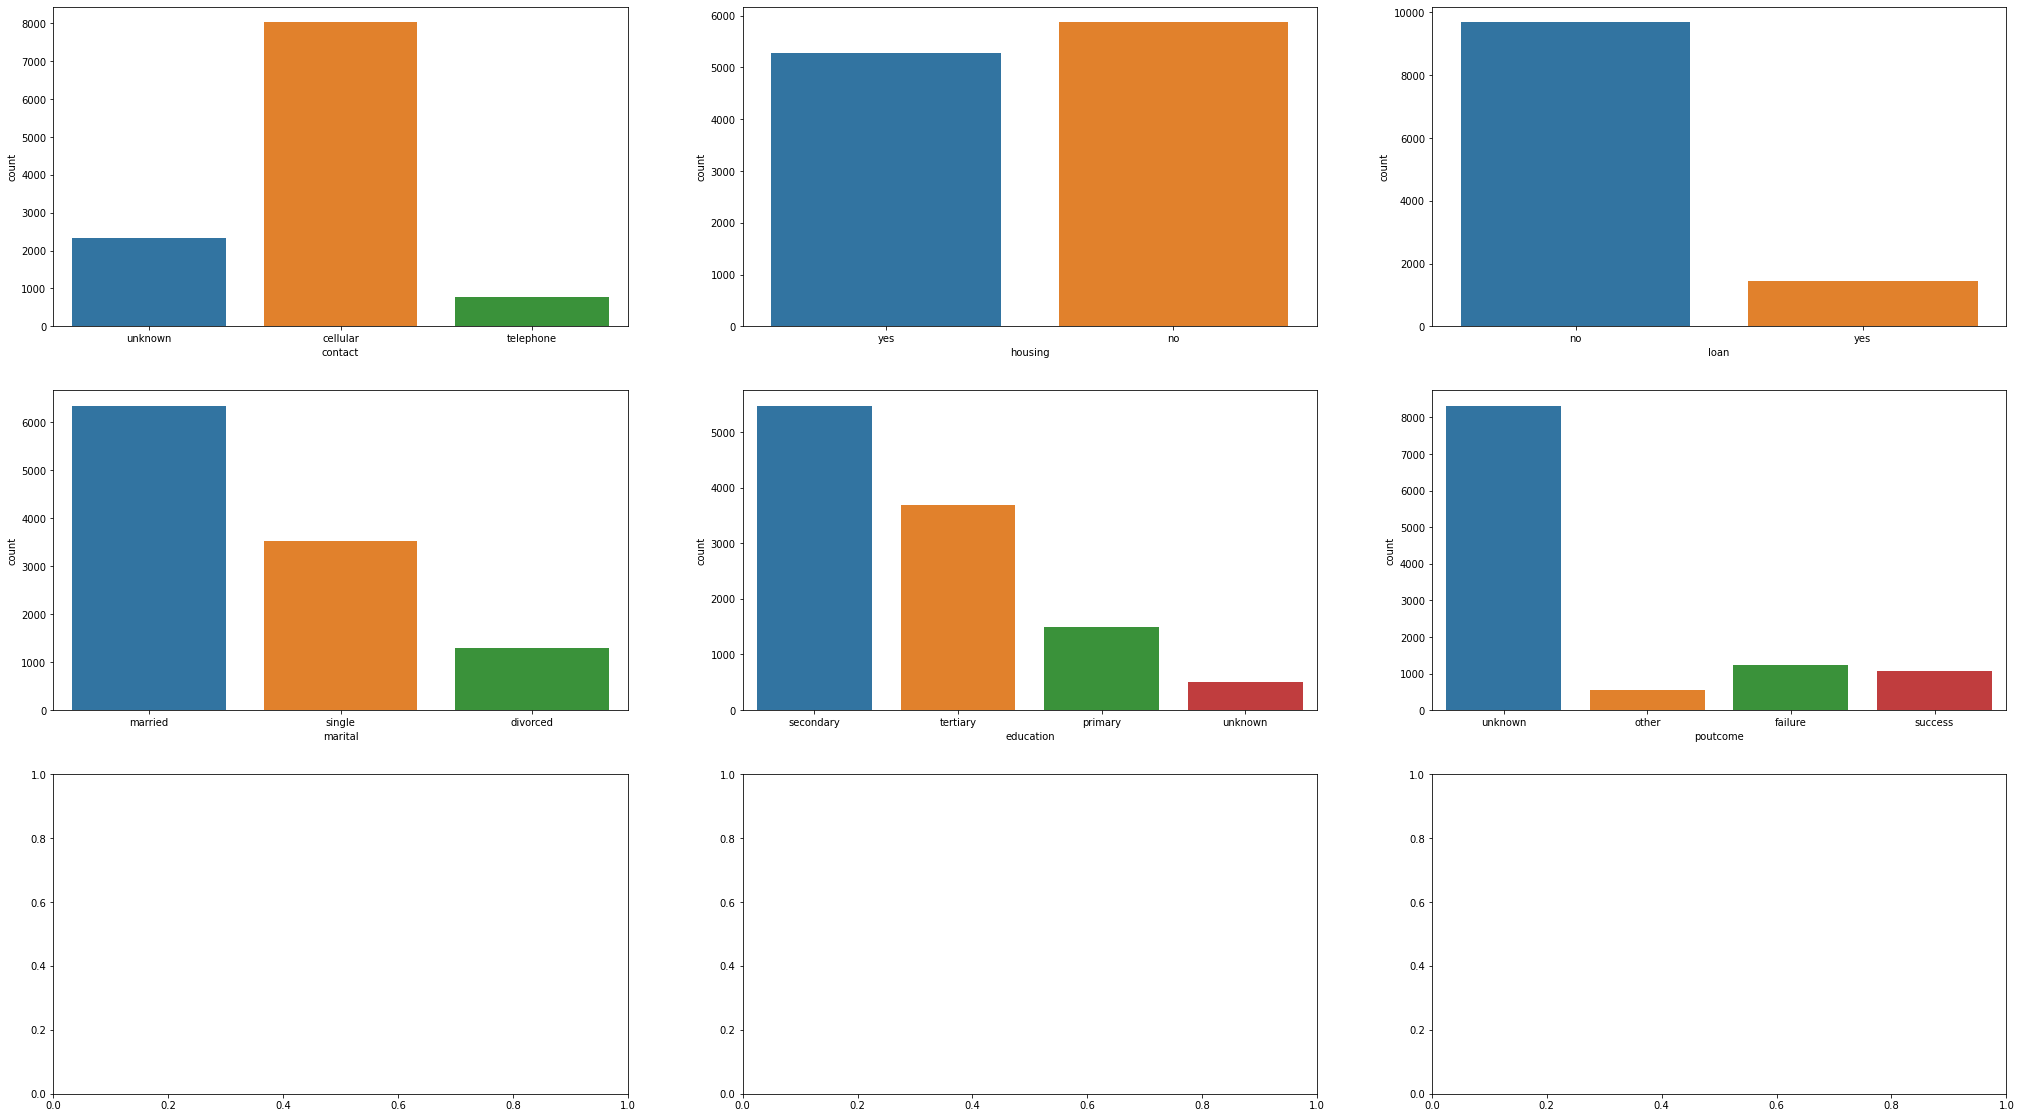

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(35,20))
sns.countplot(x="contact",data=df,ax=ax[0][0])
sns.countplot(x="housing",data=df,ax=ax[0][1])
sns.countplot(x="loan",data=df,ax=ax[0][2])
sns.countplot(x="marital",data=df,ax=ax[1][0])
sns.countplot(x="education",data=df,ax=ax[1][1])
sns.countplot(x="poutcome",data=df,ax=ax[1][2])
sns.countplot(x="day_of_week",data=df,ax=ax[2][0])
sns.countplot(x="default",data=df,ax=ax[2][1])

In [ ]:
df["y"]=df["y"].replace("no",0) 
df["y"]=df["y"].replace("yes",1)

KeyError: ignored

In [ ]:
df.drop(df[(df['balance']>40000)|(df['balance']<0)].index,inplace=True,axis=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['month'] = le.fit_transform(df['month'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,0,no,no,no,telephone,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,married,3,unknown,no,no,telephone,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,married,3,no,yes,no,telephone,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,married,1,no,no,no,telephone,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,married,3,no,no,yes,telephone,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df = df[df['marital']!='unknown']
df = df[df['education']!='unknown']
df = df[df['job']!='unknown']
df = df[df['loan']!='unknown']

In [ ]:
df = df.drop(["day_of_week",'pdays','default','housing'],axis=1) 
df = pd.get_dummies(df,columns=['marital','loan','poutcome','contact'])
df.head()

,age,job,education,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,3,0,6,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
1,57,7,3,6,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
2,37,7,3,6,226,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
3,40,0,1,6,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
4,56,7,3,6,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
Y=df['y']
data_X=df.drop(['y'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(data_X,Y, test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Logistic Regression
logreg= LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred= logreg.predict(X_test)
logreg_acc= accuracy_score(logreg_pred, Y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 90.38%


In [ ]:
print(confusion_matrix(Y_test, logreg_pred))
print("\n")
print(classification_report(Y_test, logreg_pred))

[[10415   258]
 [  900   463]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10673
           1       0.64      0.34      0.44      1363

    accuracy                           0.90     12036
   macro avg       0.78      0.66      0.70     12036
weighted avg       0.89      0.90      0.89     12036



In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
df["y"]=Y

In [ ]:
y=df['age']
x=df.drop(['age'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

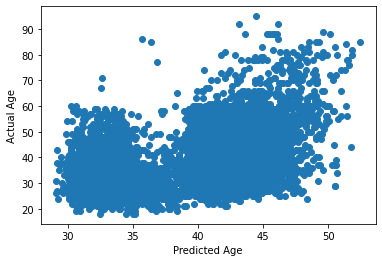

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Squared Error : {:.2f}%".format(metrics.mean_squared_error(y_test, y_pred)*100))

Mean Squared Error : 8577.46%
